In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('student-mat-por_combinedData.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0','G1','G2'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,Math


Text(0.5, 1.0, 'Correlation Heatmap')

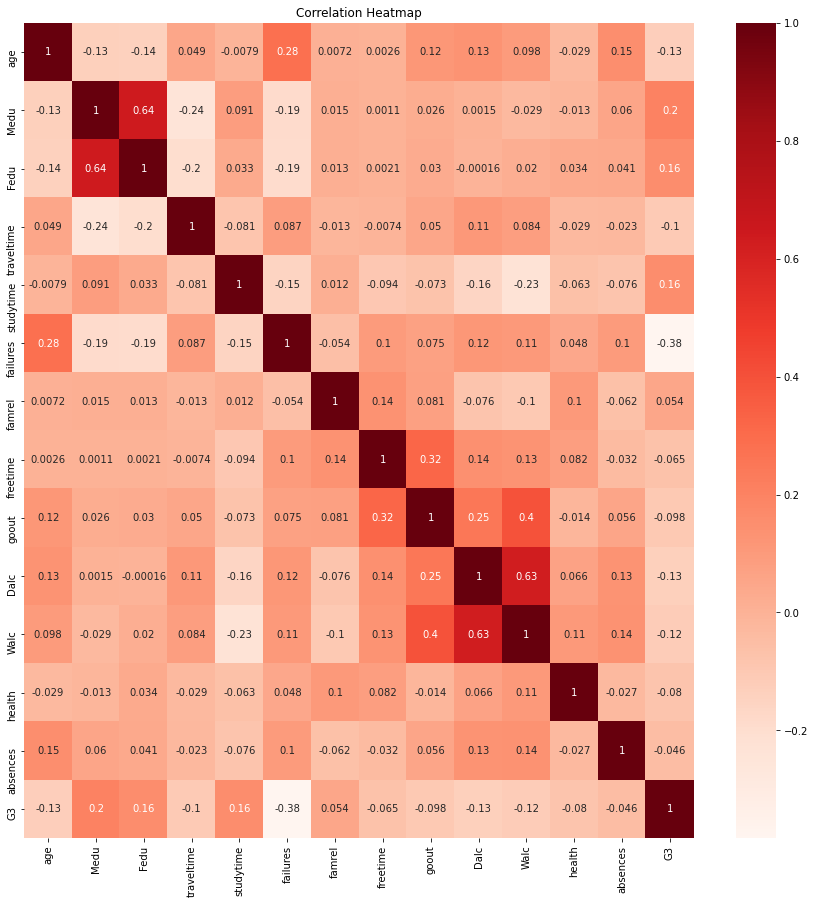

In [4]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=12)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
cor_df = df.copy()

to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic','subject']
cor_df[to_encode] = cor_df[to_encode].apply(LabelEncoder().fit_transform)
cor_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,subject
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,6,0
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,10,0
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,0
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,0,0,1,2,3,3,2,...,0,5,4,2,1,2,5,4,10,1
1040,1,0,18,1,1,1,3,1,4,3,...,0,4,3,4,1,1,1,4,16,1
1041,1,0,18,1,0,1,1,1,2,2,...,0,1,1,1,1,1,5,6,9,1
1042,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,6,10,1


Text(0.5, 1.0, 'Correlation Heatmap')

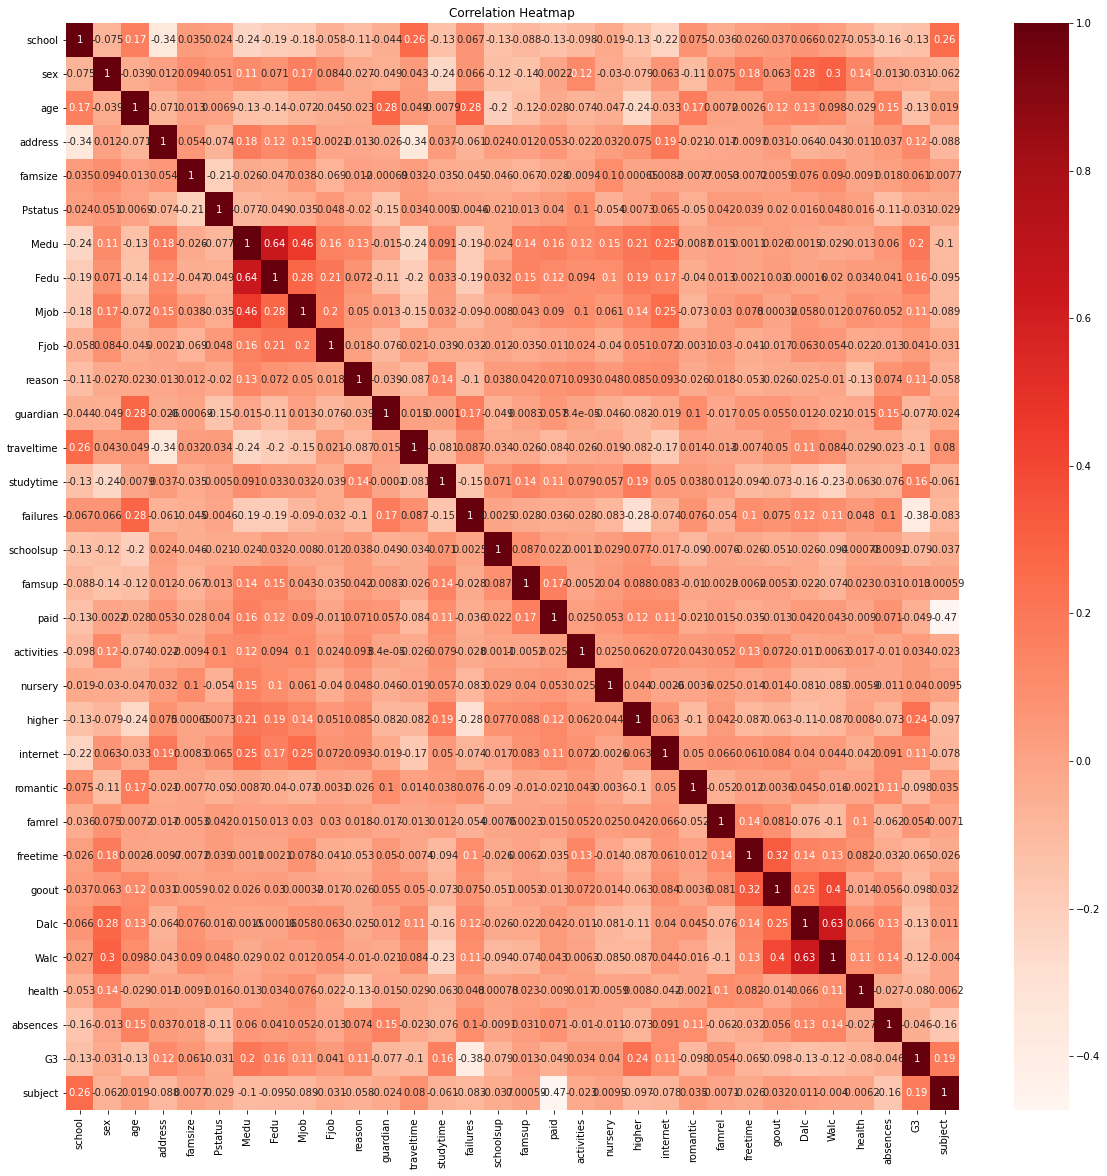

In [6]:
# see correlation between variables through a correlation heatmap

corr = cor_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=12)

# Correlation Matrix with high correlation coefficients

In [7]:
new_df = cor_df[['higher','Medu','Fedu','subject','studytime','Walc','age','school','Dalc','failures','G3']]
new_df

,higher,Medu,Fedu,subject,studytime,Walc,age,school,Dalc,failures,G3
0,1,4,4,0,2,1,18,0,1,0,6
1,1,1,1,0,2,1,17,0,1,0,6
2,1,1,1,0,2,3,15,0,2,3,10
3,1,4,2,0,3,1,15,0,1,0,15
4,1,3,3,0,2,2,16,0,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...
1039,1,2,3,1,3,2,19,1,1,1,10
1040,1,3,1,1,2,1,18,1,1,0,16
1041,1,1,1,1,2,1,18,1,1,0,9
1042,1,3,1,1,1,4,17,1,3,0,10


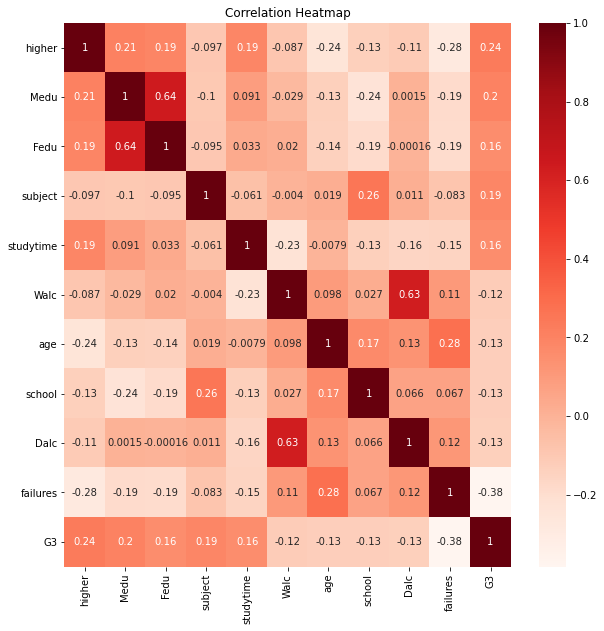

In [8]:
# see correlation between variables through a correlation heatmap

corr = new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=12)

plt.savefig('static/images/correlation_heatmap.JPG')